# 04 분류하는 뉴런

In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## 04-4 분류용 데이터셋을 준비합니다

In [16]:
## 데이터 로드
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [17]:
## 데이터를 x, y 변수에 저장
x = cancer.data
y = cancer.target

## 04-5 로지스틱 회귀로 모델을 만들어봅니다

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
## 훈련데이터세트 나누기
## stratify=y : 훈련데이터를 나눌 때 클래스비율을 동일하게 만든다
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

## 04-6 단일층 신경망을 만들어 봅니다

<퀴즈> 활성화함수를 시그모이드에서 하이퍼볼릭탄젠트로 바꾸어보세요.

In [20]:
#@title
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad
               
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        #a = np.tanh(z)  # 하이퍼볼릭탄젠트 계산
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))   #len(x): end of interval
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                # numpy.clip(array, min, max) ==> min 값 보다 작은 값들을 min값으로 바꿔주고, max 값 보다 큰 값들을 max값으로 바꿔주는 함수.
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [21]:
#@title
## LogisticNeuron 사용시 정확도는 0.82 ==> 그런데 SingleLayer의 정확도는 0.92 ==> 정확도가 향상된 이유는? 
## ==> 에포크마다 훈련세트를 무작위로 섞어 손실함수의 값을 줄였기 때문
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

C:\Users\gylee\AppData\Local\Temp\ipykernel_18832\845558548.py:19: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))  # 시그모이드 계산


0.9298245614035088

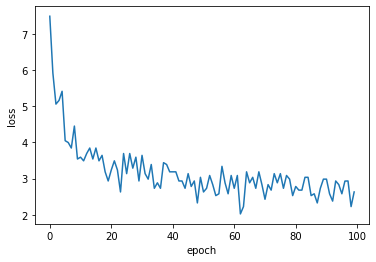

In [22]:
#@title
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()